In [4]:
import pandas as pd

transactions = pd.read_csv('transactions.csv', parse_dates = ["date"])

transaction_44 = transactions.loc[transactions["store_nbr"] == 44, ["date", "transactions"]]
transaction_44.head()

,date,transactions
38,2013-01-02,4821
84,2013-01-03,3618
130,2013-01-04,4169
176,2013-01-05,4921
222,2013-01-06,4925


In [5]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

<Axes: ylabel='transactions'>

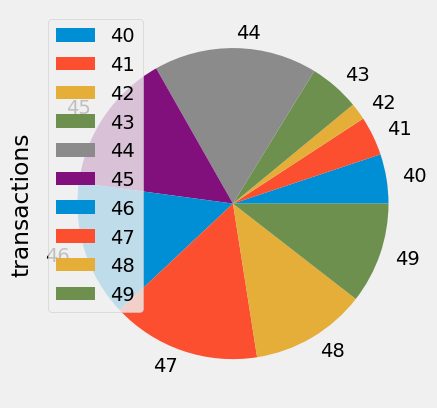

In [8]:
store_40s = list(range(40, 50))

(transactions
.query('store_nbr in @store_40s and date.dt.month in [1, 2, 3]')
.groupby("store_nbr")
.agg({"transactions": "sum"})
.plot.pie(y="transactions")
)#.legend(bbox_to_anchor=(1, 1))

<Axes: xlabel='44', ylabel='47'>

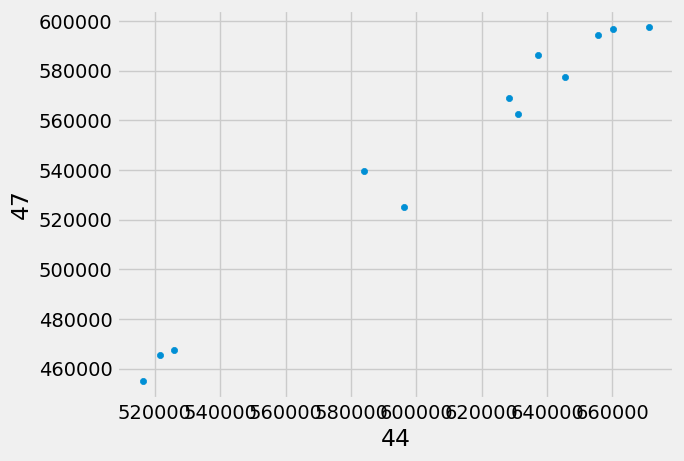

In [15]:
(transactions.query('store_nbr in @store_40s')
.pivot_table(index=transactions["date"].dt.month,
            columns="store_nbr",
            values="transactions",
            aggfunc="sum")
.plot.scatter(x=44, y=47)
)